# **Multivariate regression using Numpy only**
$\hspace{1cm}$
### 1. Imports
- **Numpy** for data processing (More precisely: speeds up the computation time with its vectorization functions)
- **matplotlib** to visualize a sample of images.
- **sklearn** has some nice datasets ready to use.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

print('imported')

imported


# 2. Data preprocess
I always organize my training data in $(n, m)$, with $n$ the number of input features and $m$ the count of training examples. I include all the training data in one single matrix that I call $X$ to use vectorization. $X$ is the design matrix here.
In the same way, the shape of output is $(1, m)$.

In [41]:
# Loading the dataset from sklearn (for more details what each feature means, check the documentation)
x, y = load_diabetes(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

x_train = x_train.T
x_test = x_test.T
y_train = np.expand_dims(y_train, axis=0)
y_test = np.expand_dims(y_test, axis=0)

print('Training features shape: {}'.format(x_train.shape))
print('Training outputs shape: {}'.format(y_train.shape))
print('Testing features shape: {}'.format(x_test.shape))
print('Testing outputs shape: {}'.format(y_test.shape))


Training features shape: (10, 353)
Training outputs shape: (1, 353)
Testing features shape: (10, 89)
Testing outputs shape: (1, 89)


# 3. Visualizing data:
Plotting the outputs with respect to each feature $x_{i}$ to make it more visible and to have an intuition about the form of the data.

I labeled the features with the notation $x_{i}$, but each one has its designation and meaning. I skipped those because it's not pertinent for the implementation, but you're free to check the documentation (``sklearn.datasets.load_diabetes``).

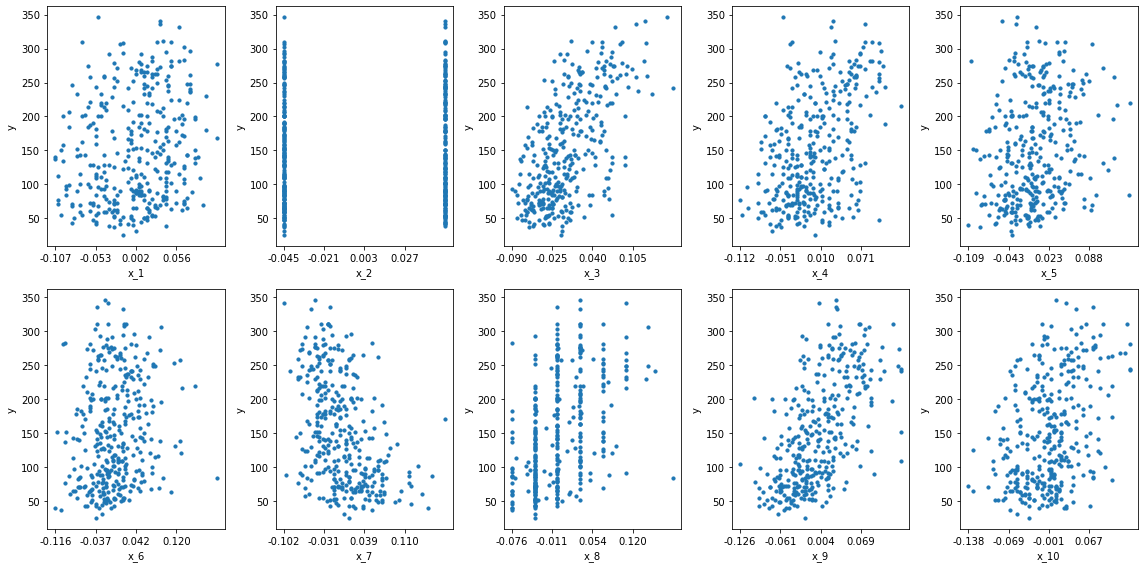

In [42]:
# Ploting outputs data with respect to features
n_ticks = 4
plt.figure(figsize=(16, 8))
for i in range(x_train.shape[0]):
    ax = plt.subplot(2, 5, i + 1)
    plt.scatter(x_train[i], y_train[0], s=10)
    maximum, minimum = np.max(x_train[i]), np.min(x_train[i])
    plt.xticks(np.arange(minimum, maximum, (maximum - minimum) / n_ticks))
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.3f}'.format(x)))
    plt.xlabel('x_{}'.format(i + 1))
    plt.ylabel('y')
plt.tight_layout()
plt.show()

# 4. Feature scaling :
Feature scaling here is critical. The values of some features are too small and create imbalances which can cause the training to be slower or even a vanishing gradient.. 
$$\exists x \in \{1, 2, .., n\} \;\; where \;\; 10^{-4} \leq x_{i} \leq 10^{-3}$$

### Formula for feature normalization :
$$ x_{i} = \frac{x_{i} - \mu_i}{s_i} \;\;\; where \;\;\; \mu_i = avg(x_i) \;\;\; and \;\;\; s_i = std(x_i)$$
(Average value, and standard deviation)

In [43]:
feature_scaling = lambda x: (x - np.mean(x)) / np.std(x)
for i in range(x_train.shape[0]):
    x_train[i], x_test[i] = feature_scaling(x_train[i]), feature_scaling(x_test[i])

# 5. Adding a row vector of ones ``np.ones((1, m))``
This vector will help add the bias when vectorizing the matrices. Practically, we'll have $n + 1$ features.

In [44]:
x_train = np.vstack((np.ones((1, x_train.shape[1])), x_train))
x_test = np.vstack((np.ones((1, x_test.shape[1])), x_test))

# 6. Definition of the **Linear regression model**
Given $n$ input features, our hypothesis function will be defined as follows :
$$h_{\theta}(x) = b + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$
The bias represents the first parameter of $\theta$, which will be multiplied by 1 : $ b = \theta_0 \times 1 = \theta_0 x_0$  
$h_{\theta}(x)$ can be summerized to :
$$h_{\theta}(x) = \sum_{i=0}^n \theta_{i}x_i$$
Vectorized version (Important because it speeds up the training, Numpy uses [SIMD](https://fr.wikipedia.org/wiki/Single_instruction_multiple_data) units automatically when using its matrix multiplication function):
$$h_{\theta}(x) = \begin{bmatrix} \theta_0x_0^{(1)} + \theta_1x_1^{(1)} + \theta_2x_2^{(1)} + ... + \theta_nx_n^{(1)} \\ \theta_0x_0^{(2)} +\theta_1x_1^{(2)} + \theta_2x_2^{(2)} + ... + \theta_nx_n^{(2)} \\... \\\theta_0x_0^{(m)} + \theta_1x_1^{(m)} + \theta_2x_2^{(m)} + ... +\theta_nx_n^{(m)}\end{bmatrix} = \begin{bmatrix}\theta_0 && \theta_1 && \theta_2 && ... && \theta_n\end{bmatrix} \times\begin{bmatrix}x_0^{(1)} && x_0^{(2)} && ... && x_0^{(m)} \\x_1^{(1)} && x_1^{(2)} && ... && x_1^{(m)} \\... \\x_n^{(1)} && x_n^{(2)} && ... && x_n^{(m)}\end{bmatrix}$$

$$Finally \;\;\; h_{\theta}(x) = \theta^TX$$

Training using a gradient descent and MSE loss function :
$$\theta := \theta - \eta \times \frac{\partial}{\partial \theta} J(\theta) \;\; with \;\; J(\theta) = \frac{1}{2m} (h_{\theta}(x) - y)^2$$
Vectorized version of gradient descent :

$$\theta_j := \theta_j - \frac{\eta}{m} \sum_{i=1}^m x_j^{(i)}(h_{\theta}(x^{(i)}) - y^{(i)})$$

$$\theta := \theta - \eta \times
\begin{bmatrix}
    x_0^{(1)} \hat{y}^{(1)} + x_0^{(2)} \hat{y}^{(2)} + ... + x_0^{(m)} \hat{y}^{(m)} \\
    x_2^{(1)} \hat{y}^{(1)} + x_2^{(2)} \hat{y}^{(2)} + ... + x_2^{(m)} \hat{y}^{(m)} \\
    ... \\
    x_n^{(1)} \hat{y}^{(1)} + x_n^{(2)} \hat{y}^{(2)} + ... + x_n^{(m)} \hat{y}^{(m)}
\end{bmatrix}$$

$$\theta := \theta - \eta \times \begin{bmatrix}x_0^{(1)} && x_0^{(2)} && ... && x_0^{(m)} \\x_1^{(1)} && x_1^{(2)} && ... && x_1^{(m)} \\... \\x_n^{(1)} && x_n^{(2)} && ... && x_n^{(m)}\end{bmatrix} \times\begin{bmatrix}\hat{y}^{(1)} \\ \hat{y}^{(2)} \\ ... \\ \hat{y}^{(m)}\end{bmatrix}$$

$$\theta := \theta - \eta \times \begin{bmatrix}x_0^{(1)} && x_0^{(2)} && ... && x_0^{(m)} \\x_1^{(1)} && x_1^{(2)} && ... && x_1^{(m)} \\... \\x_n^{(1)} && x_n^{(2)} && ... && x_n^{(m)} \end{bmatrix} \times (\begin{bmatrix}\theta_Tx^{(1)} && \theta_Tx^{(2)} && ... && \theta_Tx^{(m)}\end{bmatrix}- \begin{bmatrix}y^{(1)} && y^{(2)} && ... && y^{(m)}\end{bmatrix} )^T$$
    
$$Finally \;\; \theta := \theta - \eta \times X(h_{\theta}(x) - Y)^T$$

In [45]:
class LinearRegression:
    def __init__(self, n_feature, learning_rate=0.001, n_iters=100, step=10, verbose=True):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.n_feature = n_feature
        self.step = step
        self.verbose = verbose
        self.theta = np.zeros((self.n_feature, 1))

    def fit(self, x, y):
        m = y.shape[1]
        self.history = []
        for _ in range(self.n_iters):
            # cost = (1 / (2 * m)) * np.sum(self.loss(x, y))
            y_hat = self.predict(x)
            c = self.cost(y_hat, y)
            self.history.append(c)

            # Updating the theta vector
            error_term = (y_hat - y)
            gradient = np.dot(x, error_term.T)
            self.theta = self.theta - self.learning_rate * (1 / m) * gradient
            
            if self.verbose and _ % self.step == 0:
                print('Cost: {}'.format(c))

        # Plotting the final cost value
        print('Final cost is: {}'.format(c))

    def loss(self, x, y):
        return (x - y) ** 2

    def cost(self, x, y):
        m = y.shape[1]
        return (1 / (2 * m)) * np.sum(self.loss(x, y))

    def predict(self, x):
        return np.dot(self.theta.T, x)

    def print_loss(self):
        x_ticks = np.arange(0, self.n_iters, self.step)
        if x_ticks.shape[0] > 10:
            x_ticks = 10
        fig, ax = plt.subplots(1, figsize=(10, 6))
        ax.plot(np.arange(self.n_iters), self.history)
        ax.set_xlabel('Iterations')
        ax.set_ylabel('Cost')
        ax.set_xticks(x_ticks)
        plt.show()

# 7. Fitting the model

In [46]:
regressor = LinearRegression(x_train.shape[0], learning_rate=0.01, n_iters=800, step=800 // 10, verbose=True)
regressor.fit(x_train, y_train)

Cost: 14557.573654390935
Cost: 3823.2100377294432
Cost: 1869.7945695674975
Cost: 1476.4864478961767
Cost: 1396.41779123125
Cost: 1379.7591145639958
Cost: 1376.0936032379338
Cost: 1375.155397670346
Cost: 1374.8191058146635
Cost: 1374.6297795788971
Final cost is: 1374.4851783658535


# 8. Plotting the loss:
Training the model for more iterations will not improve it. We reached a loss plateau, which is the maximum we can get from this linear regression.

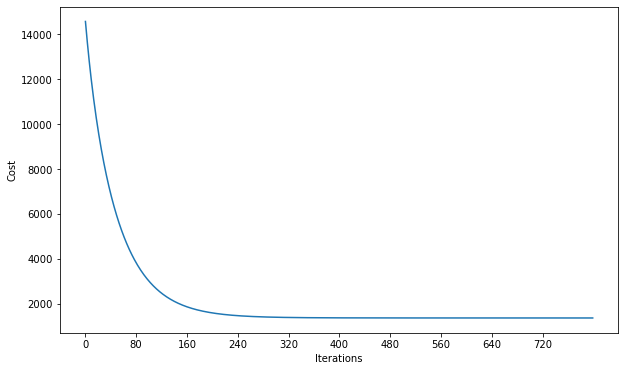

In [47]:
regressor.print_loss()

# 9. Plotting the data 
Since we cannot have a function grouping more than three dimensions (Unless using contour plots), I plot the linear regression function of each feature only, and I ignore all the other features. This approach gives us an idea about how the regression is performing (Approximates the final function only).

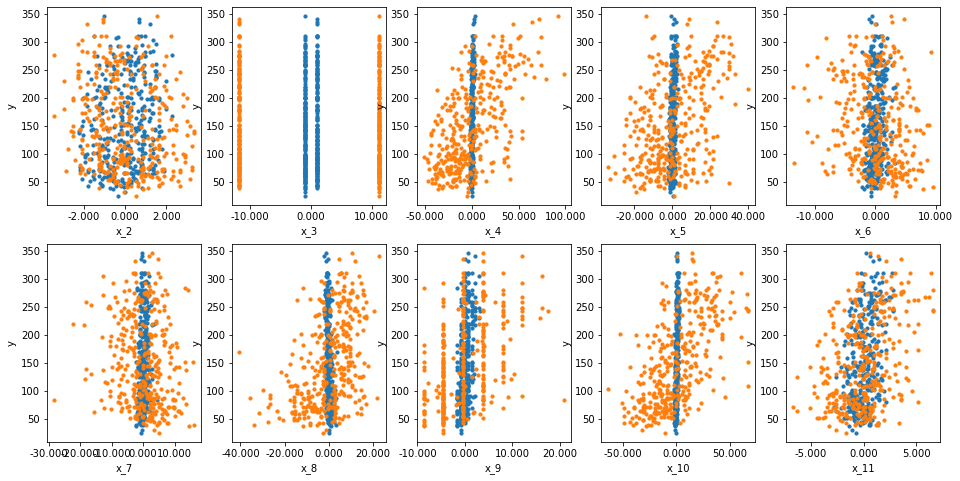

In [48]:
plt.figure(figsize=(16, 8))
for i in range(1, x_train.shape[0]):
    ax = plt.subplot(2, 5, i)
    plt.scatter(x_train[i], y_train[0], s=10)
    plt.scatter(x_train[i] * regressor.theta[i], y_train[0], s=10)
    ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '{:.3f}'.format(x)))
    plt.xlabel('x_{}'.format(i + 1))
    plt.ylabel('y')
plt.show()